# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


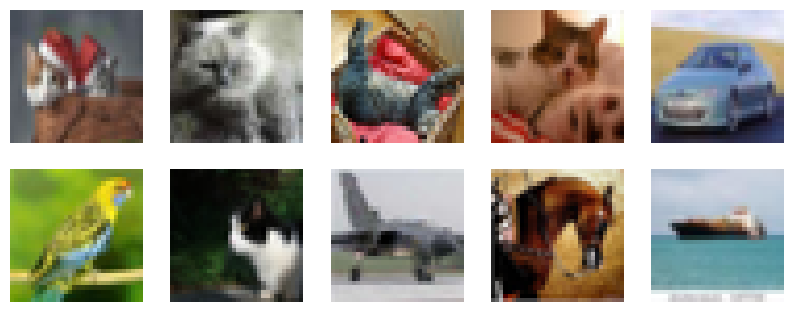

In [3]:
import matplotlib.pyplot as plt

# Plotting 10 images from CIFAR-10 dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    random_index = np.random.randint(0, x_train.shape[0])  #random index
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[random_index])
    plt.axis('off')
plt.show()


In [10]:
# Normalizing our data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
# Preparing lables via one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [6]:
from keras.backend import clear_session
clear_session()

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [9]:
cifar_trained = model.fit(x_train, y_train, batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.2022 - loss: 2.2037
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3122 - loss: 1.9565
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3363 - loss: 1.8817
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3698 - loss: 1.8110
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3763 - loss: 1.7775
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3917 - loss: 1.7479
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4102 - loss: 1.6936
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4224 - loss: 1.6601
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4277 - loss: 1.6384
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4350 - loss: 1.6170
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4467 - loss: 1.5823
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4

*   Plot the cross entropy loss curve and the accuracy curve

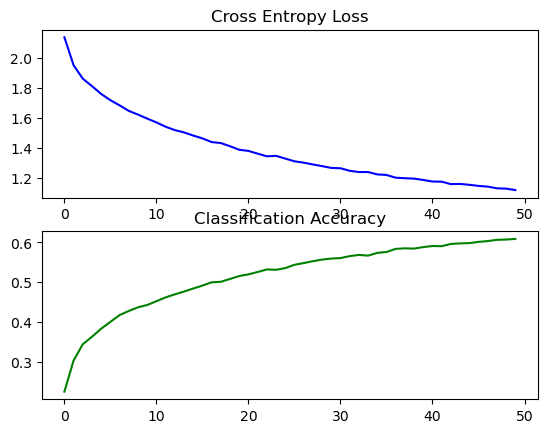

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(cifar_trained.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(cifar_trained.history['accuracy'], color='green', label='train')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [10]:
from keras.backend import clear_session
clear_session()

In [11]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [13]:
cifar_trained_2 = model.fit(x_train, y_train, batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.1822 - loss: 2.2576
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2947 - loss: 1.9989
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3371 - loss: 1.8911
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3664 - loss: 1.8087
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3900 - loss: 1.7414
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4109 - loss: 1.6903
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4199 - loss: 1.6517
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4394 - loss: 1.6048
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4558 - loss: 1.5570
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4665 - loss: 1.5263
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4770 - loss: 1.4951
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


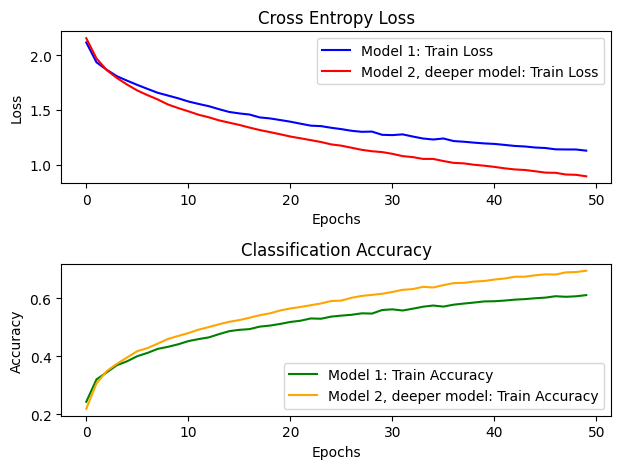

In [16]:
# Subplot for Loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(cifar_trained.history['loss'], color='blue', label='Model 1: Train Loss')
plt.plot(cifar_trained_2.history['loss'], color='red', label='Model 2, deeper model: Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(cifar_trained.history['accuracy'], color='green', label='Model 1: Train Accuracy')
plt.plot(cifar_trained_2.history['accuracy'], color='orange', label='Model 2, deeper model: Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Combined plots
plt.tight_layout()
plt.show()


**Comment on the observation**

- The deeper model performs better as seen in both the cross entropy loss and the accuracy achieved. Although the fist epochs are worse, it rapidly improves the performance of the simpler model.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


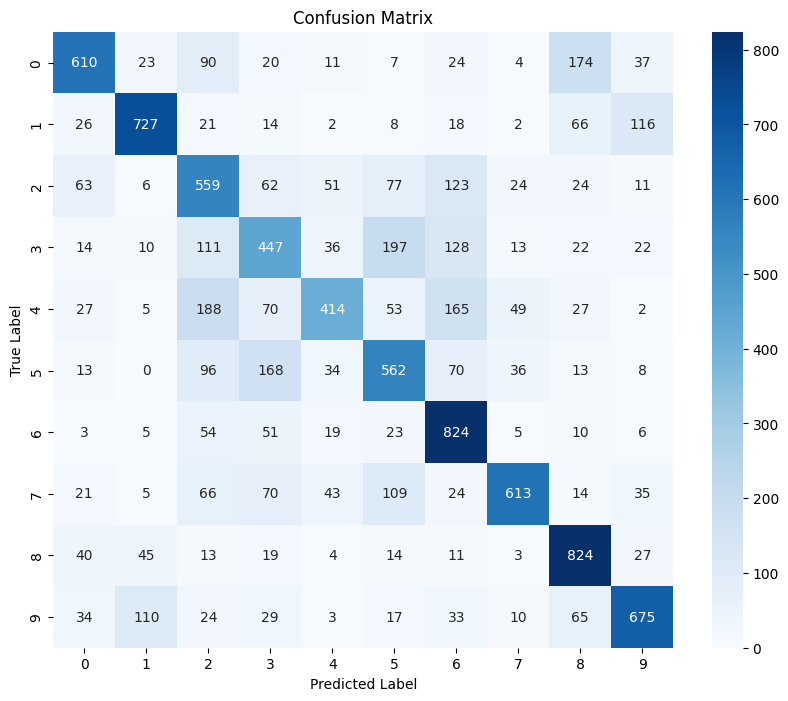

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions and true labels
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(gt, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Comment here :**

- The model is still not very accurate with plenty of missclassification. As seen by all the predictions not in the diagonal.
...

*    Print the test accuracy for the trained model.

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6299 - loss: 1.0470
Test loss: 1.0588942766189575
Test accuracy: 0.6255000233650208


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [23]:
from keras.backend import clear_session
clear_session()

In [12]:
from tensorflow.image import resize
import numpy as np

# Resize training and test data to (64, 64, 3)
x_train_resized = np.array([resize(image, (64, 64)) for image in x_train])
x_test_resized = np.array([resize(image, (64, 64)) for image in x_test])

x_train_resized = x_train_resized.astype('float32')
x_test_resized = x_test_resized.astype('float32')


In [13]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',  input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [14]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model using resized data
cifar_trained_3 = model.fit(x_train_resized, y_train, batch_size=512, epochs=10)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 544ms/step - accuracy: 0.2057 - loss: 2.2060
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 321ms/step - accuracy: 0.3357 - loss: 1.8639
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 326ms/step - accuracy: 0.3972 - loss: 1.6967
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - accuracy: 0.4371 - loss: 1.5886
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 329ms/step - accuracy: 0.4675 - loss: 1.5050
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - accuracy: 0.4936 - loss: 1.4398
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.5132 - loss: 1.3774
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 334ms/step - accuracy: 0.5321 - loss: 1.3332
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.5482 - loss: 1.2884
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 334ms/step - accuracy: 0.5644 - loss: 1.2322


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


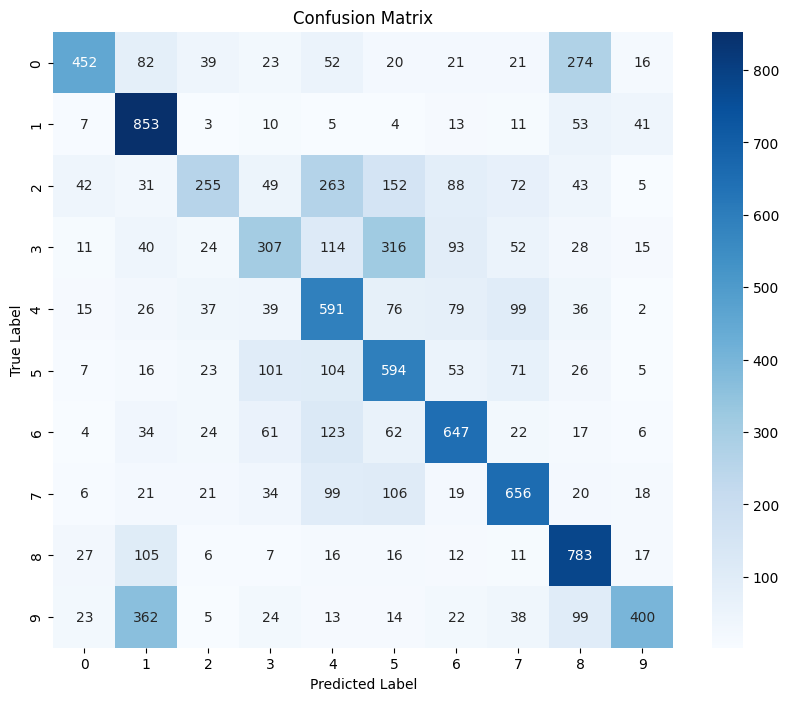

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate predictions and true labels
predictions_3 = model.predict(x_test_resized)
predictions_3 = np.argmax(predictions_3, axis=1)
gt = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(gt, predictions_3)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5590 - loss: 1.2302
Test loss: 1.2356071472167969
Test accuracy: 0.5537999868392944


The creation of a deeper model with more layers does show better accuracy at 10 epochs compared to the older models at also 10 epochs. It is likely that running this deeper model for longer ( maybe the same 50 epochs) could lead to significantly better results. But as it currently is, tere are still plenty of wrong predictions.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
_ Activation functions provide the models with non-linearity. Therefore, allowing the model to learn from complex patterns and relationships found in the data. They determine when the neuron is activated or not. Meaning, the output is useful. 
2 - Key Differences between sigmoid and softmax:

_We use sigmoid when we expect a binary outcome. For multi-class we would use Softmax. 

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
_Categorical Crossentropy is used for problems dealing with multi-class while binary crossentropy is used for binary problems. 
